# 統計解析

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 描画ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

## データの読み込み

In [4]:
import requests, zipfile
import io
from io import StringIO

インターネットに繋がっている場合，指定したURLからデータを取得できます．
また，zip ファイルを展開できます．

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# urlから取得
rdata = requests.get(url, stream=True)

# zipfileを展開
z = zipfile.ZipFile(io.BytesIO(rdata.content))
z.extractall()

BadZipFile: File is not a zip file

ディレクトリ（フォルダ）を確認します．

In [4]:
ls

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は 1A6F-EF1C です

 C:\Users\ohno\jpnb のディレクトリ

2020/11/06  10:44    <DIR>          .
2020/11/06  10:44    <DIR>          ..
2020/11/06  10:36    <DIR>          .ipynb_checkpoints
2020/10/18  15:44             9,335 classification.ipynb
2020/11/03  17:54            58,855 preprocessing.ipynb
2020/10/18  15:44             9,176 regression.ipynb
2020/11/06  10:44             7,738 statistics.ipynb
2020/11/06  10:44             3,206 student.txt
2020/11/06  10:44            56,993 student-mat.csv
2020/11/06  10:44               269 student-merge.R
2020/11/06  10:44            93,220 student-por.csv
2020/10/18  15:29             8,115 unsupervised.ipynb
2020/10/18  15:44             6,161 visualization.ipynb
              10 個のファイル             253,068 バイト
               3 個のディレクトリ  127,458,557,952 バイトの空き領域


### CSVファイルをDataFrameに読み込む

In [5]:
student_data = pd.read_csv('student-mat.csv', sep=';')

最初の5行を確認します．

In [6]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### データの個数や型の確認

In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

ここで，object は質的データです．int64 は量的データとなります．

### ヒストグラム

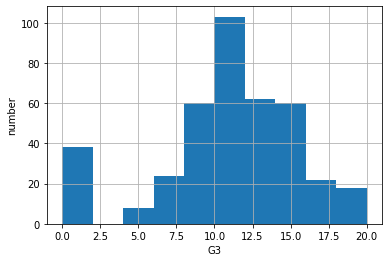

In [8]:
plt.hist(student_data['G3'])

# x軸とy軸のラベル
plt.xlabel('G3')
plt.ylabel('number')

# グリッドオン
plt.grid(True)

### 平均、中央値、最頻値

In [9]:
print('平均値：', student_data['G3'].mean())
print('中央値：', student_data['G3'].median())
print('最頻値：', student_data['G3'].mode())

平均値： 10.415189873417722
中央値： 11.0
最頻値： 0    10
dtype: int64


(標本）平均
\begin{eqnarray}
\overline{x}=\frac{1}{N}\sum^{N-1}_{n=0}x_n
\end{eqnarray}

### 分散と標準偏差

分散は平均からのばらつきの程度を示します．
\begin{eqnarray}
\sigma^2 = \frac{1}{N}\sum^{N-1}_{n=0}(x_n-{\overline{x}} )^2
\end{eqnarray}

In [10]:
student_data['G3'].var()

20.989616397866737

標準偏差は分散のルートをとったものです．

In [11]:
student_data['G3'].std()

4.5814426109978434

describe メソッドで統計量を求めることができます．

In [12]:
student_data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

ここで，25％，50％，75％は，パーセンタイル値で，全体を100としたときの25番目，50番目，75番目に相当する値です．
これらは，第一四分位点，第二四分位点，第三四分位点と呼びます．

### 箱ひげ図

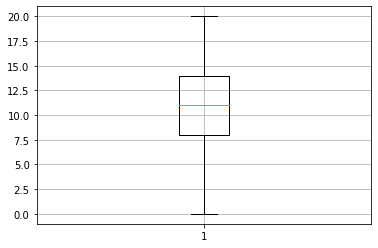

In [13]:
plt.boxplot(student_data['G3'])
plt.grid(True)

## 2変数の統計量

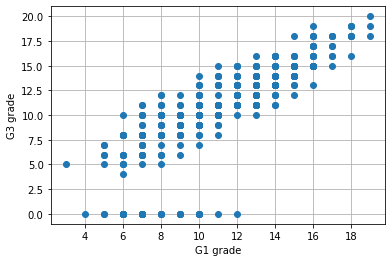

In [14]:
plt.plot(student_data['G1'], student_data['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

ふたつの変数の関係を示す量に共分散があります．
\begin{eqnarray}
r_{xy} = \frac{1}{N}\displaystyle \sum_{n = 0}^{N-1} (x_n - \overline{x})
(y_n - \overline{y})
\end{eqnarray}

In [15]:
np.cov(student_data['G1'], student_data['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

共分散を正規化したものが相関です．
\begin{eqnarray}
c_{xy} = \frac{\displaystyle \sum_{n = 0}^{N-1} (x_n - \overline{x})
(y_n - \overline{y})}{\sqrt{\displaystyle \sum_{n = 0}^{N-1}
(x_n - \overline{x})^2}\sqrt{\displaystyle \sum_{n = 0}^{N-1} 
(y_n - \overline{y})^2}}
\end{eqnarray}

相関は -1 から１までの値をとり，０のとき無相関といいます．

In [16]:
np.corrcoef([student_data['G1'], student_data['G3']]) 

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

Copyright. All rights reserved. Shuichi OHNO, 2020.